In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd


In [2]:
pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/kaggle/input/ai-forge-gdgsrmist/train.csv')

In [4]:
df.sample(10)

,ID,file_id,genre
5254,5255,train_05255.wav,pop
6198,6199,train_06199.wav,rap
3090,3091,train_03091.wav,heavymetal
99,100,train_00100.wav,classical
5763,5764,train_05764.wav,pop
5354,5355,train_05355.wav,pop
297,298,train_00298.wav,classical
2173,2174,train_02174.wav,electronic
1253,1254,train_01254.wav,country
2391,2392,train_02392.wav,heavymetal


In [5]:
df['genre'].value_counts()

genre
lofi          977
electronic    900
pop           896
jazz          879
heavymetal    861
country       700
rap           690
classical     673
Name: count, dtype: int64

# EDA

In [6]:
ipd.Audio('/kaggle/input/ai-forge-gdgsrmist/train/train/train_00001.wav')

In [7]:
y , sr = librosa.load('/kaggle/input/ai-forge-gdgsrmist/train/train/train_00001.wav')

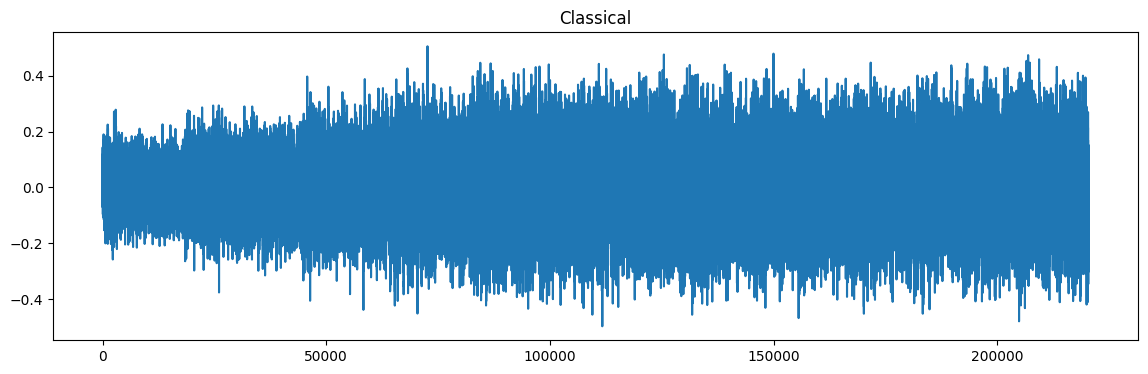

In [8]:
plt.figure(figsize=(14,4))
plt.plot(y)
plt.title("Classical")
plt.show()

In [9]:
ipd.Audio('/kaggle/input/ai-forge-gdgsrmist/train/train/train_00828.wav')

In [10]:
y , sr = librosa.load('/kaggle/input/ai-forge-gdgsrmist/train/train/train_00828.wav')

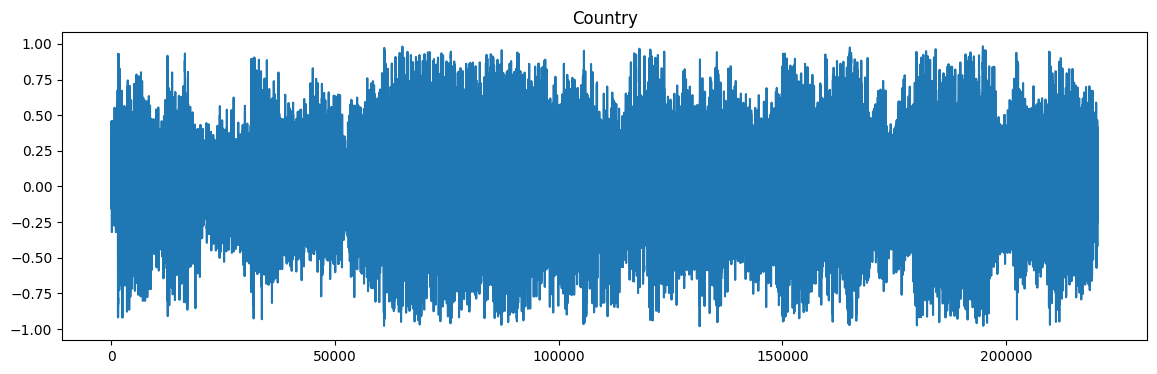

In [11]:
plt.figure(figsize= (14,4))
plt.title("Country")
plt.plot(y)

In [12]:
ipd.Audio('/kaggle/input/ai-forge-gdgsrmist/train/train/train_01501.wav')

In [13]:
y , sr = librosa.load('/kaggle/input/ai-forge-gdgsrmist/train/train/train_01501.wav')

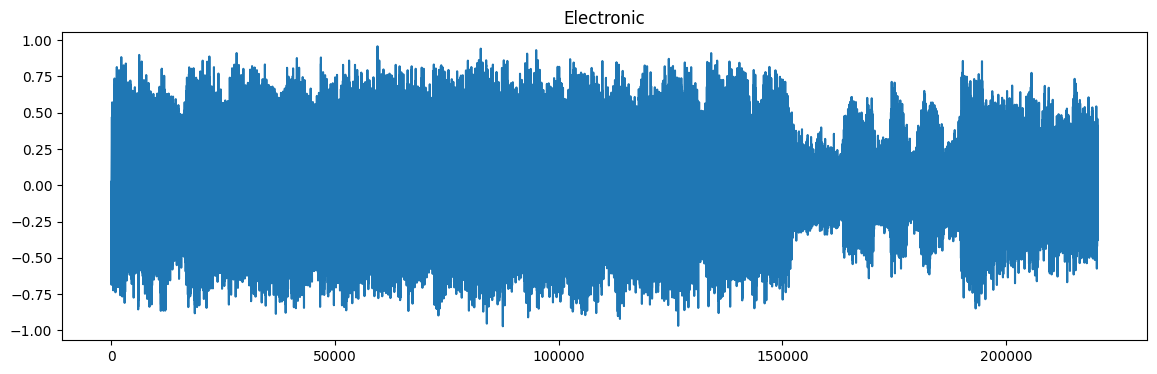

In [14]:
plt.figure(figsize= (14,4))
plt.title("Electronic")
plt.plot(y)

# Preprocessing

In [15]:
import os

audio_dir = '/kaggle/input/ai-forge-gdgsrmist/train/train'

audio_files = [
    os.path.join(audio_dir, f)
    for f in os.listdir(audio_dir)
    if f.endswith('.wav')
]

In [16]:
lab_map = dict(zip(df['file_id'],df['genre']))

In [17]:
#mfcc

def feature_ext(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast') 

    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    mfcc_delta = librosa.feature.delta(mfcc)

    mfcc_mean = np.mean(mfcc.T, axis=0)
    mfcc_std = np.std(mfcc.T, axis=0)
    mfcc_max = np.max(mfcc.T, axis=0)
    
    delta_mean = np.mean(mfcc_delta.T, axis=0)
    
    return np.concatenate([mfcc_mean, mfcc_std, mfcc_max, delta_mean])

# Audio Transformation (Feature Extraction)

In [18]:
from tqdm import tqdm
features =[]
output = []
for i in tqdm(audio_files):
    mfcc = feature_ext(i)
    features.append(mfcc)
    filename = i.split('/')[-1]
    output.append(lab_map[filename])


100%|██████████| 6576/6576 [20:03<00:00,  5.46it/s]


In [19]:
X= np.array(features)
y =np.array(output)

In [20]:
X[0:2]


array([[-1.99347549e+02,  1.28655731e+02, -1.75481815e+01,
         3.84489212e+01,  9.13462043e-01,  2.28380585e+01,
         1.11063814e+01,  1.03626909e+01,  8.11634254e+00,
         1.14251986e+01, -2.15793729e+00,  9.61929226e+00,
        -4.10767126e+00,  5.75065517e+00, -6.92092466e+00,
         1.12903728e+01,  3.59333754e+00,  1.32525854e+01,
         1.56112349e+00,  1.12830484e+00, -7.76581907e+00,
         1.82645476e+00,  3.32507730e+00,  6.28911781e+00,
        -3.28479266e+00, -6.89568281e-01,  1.18835807e+00,
         5.40013123e+00, -4.10642415e-01, -2.12695742e+00,
         3.55636567e-01,  6.23849869e+00,  4.59477711e+00,
         1.49444461e+00,  2.94149250e-01, -1.60625827e+00,
        -5.70720577e+00, -3.93093634e+00, -4.74757582e-01,
        -2.91446000e-01,  9.69802094e+01,  3.08685379e+01,
         1.75027142e+01,  1.47864332e+01,  1.32584486e+01,
         1.22005787e+01,  1.19192495e+01,  1.35555897e+01,
         1.01169376e+01,  7.82334709e+00,  9.64413643e+0

In [21]:
y[0:3]

array(['electronic', 'lofi', 'country'], dtype='<U10')

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_trans = le.fit_transform(y)

In [23]:
y_trans[0:100]

array([2, 5, 1, 5, 2, 4, 0, 5, 0, 2, 3, 7, 5, 5, 1, 4, 2, 7, 7, 1, 4, 5,
       5, 1, 2, 0, 0, 3, 2, 4, 5, 4, 6, 2, 5, 1, 4, 4, 7, 2, 4, 4, 3, 2,
       5, 3, 0, 5, 3, 1, 3, 6, 6, 2, 1, 4, 4, 4, 7, 4, 6, 1, 5, 6, 0, 3,
       0, 5, 5, 2, 2, 1, 0, 7, 7, 6, 7, 6, 7, 0, 5, 6, 4, 3, 2, 4, 5, 3,
       2, 0, 3, 5, 0, 2, 7, 1, 7, 2, 6, 2])

# Model Training & Evaluation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_val,y_train,y_val = train_test_split(X,y_trans,test_size =0.2,random_state=42)

ss = StandardScaler()

x_train =ss.fit_transform(x_train)
x_val =ss.fit_transform(x_val)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators = 1000,
    max_depth=18,
    min_samples_split= 5,
    min_samples_leaf = 2,
    random_state= 42,
    n_jobs =-1
)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_val)
print("accuracy : ",accuracy_score(y_val,y_pred))

accuracy :  0.7226443768996961


In [26]:
num_class = len(np.unique(y_train))


In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,      
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.3,
    reg_lambda=2.0,
    objective="multi:softprob",
    num_class=num_class,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb.fit(x_train, y_train)
y_pre = xgb.predict(x_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pre))

XGBoost Accuracy: 0.7165653495440729


In [28]:
train_acc = accuracy_score(y_train, xgb.predict(x_train))
val_acc   = accuracy_score(y_val, xgb.predict(x_val))

print(train_acc, val_acc)

0.8885931558935362 0.7165653495440729


# Submission

In [29]:
sub = pd.read_csv("/kaggle/input/ai-forge-gdgsrmist/sample_submission.csv")

sub.sample(100)

,file_id,genre
1968,test_pri_01121.wav,NaN
2105,test_pri_01258.wav,NaN
658,test_pub_00659.wav,NaN
1839,test_pri_00992.wav,NaN
1740,test_pri_00893.wav,NaN
...,...,...
1863,test_pri_01016.wav,NaN
326,test_pub_00327.wav,NaN
2640,test_pri_01793.wav,NaN
567,test_pub_00568.wav,NaN


In [30]:
test_audio_dir = "/kaggle/input/ai-forge-gdgsrmist/test/test"

test_paths = [
    f"{test_audio_dir}/{fid}"
    for fid in sub["file_id"]
]


In [31]:
X_test = []

for path in test_paths:
    X_test.append(feature_ext(path))  

X_test = np.array(X_test)
X_test = ss.transform(X_test)

In [32]:
test_preds = xgb.predict(X_test)
test_preds = le.inverse_transform(test_preds)


In [33]:
submission = pd.DataFrame({
    "file_id": sub["file_id"],   
    "genre": test_preds          
})

submission.to_csv("submission.csv", index=False)
